# Goal

The Goal of the project is to predict whether a company will go bankrupt in the following year, based on financial attributes of the company. 
Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline
!pip install imbalanced-learn


# Helper API

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529



## Description of attributes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

### Assumption of the project:
You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

## Data Processing

In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


1. Removing ID column from the data with the assumption that it doesn't contribute in deciding Bankruptcy of the company.

In [8]:
data = data.drop(columns=["Id"], axis = 1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.141650,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.049940,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.027178,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,-0.020100,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0


In [9]:
data.shape

(4818, 65)

2. Converting the attribute data to numeric, Performing linear interpolation of data to fill NaN Values as dropping reduces the number of observations to almost half the number. As the data doesn't have numerical features and through the following step, it is converted to numerical data, we can proceed ahead.

In [10]:
data = data.apply(pd.to_numeric, errors='coerce')
data = data.interpolate()
data.isnull().sum()

X1          0
X2          0
X3          0
X4          0
X5          0
           ..
X61         0
X62         0
X63         0
X64         0
Bankrupt    0
Length: 65, dtype: int64

3. Checking Class Balance

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Bankrupt'>

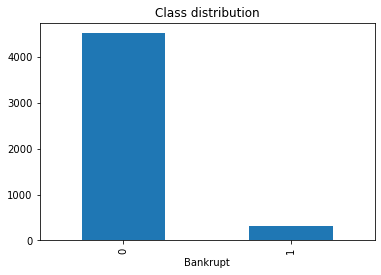

In [11]:
data.pivot_table(index='Bankrupt', aggfunc='size').plot(kind='bar', title = 'Class distribution')

In [12]:
data['Bankrupt'].value_counts()

0    4510
1     308
Name: Bankrupt, dtype: int64

The class imbalance is very high, hence just using accuracy score as a metric is not a good option for testing the model accuracy on the test data.

Splitting the dataset into training and testing datasets.

In [13]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:-1]
y = data.iloc[:, -1]
X,y = sklearn.utils.shuffle(X, y, random_state=42)
X_train = None
X_test = None
y_train = None
y_test = None

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3854, 64)
X_test shape:  (964, 64)
y_train shape:  (3854,)
y_test shape:  (964,)


Handling Data Imbalance using SMOTE(Synthetic Minority Oversampling Technique) method in which new instances are synthesized from the existing data (Works like k nearest neighbour). Usage of this technique over Over-Sampling and Under-Sampling avoids Overfitting and underfitting problems.

In [14]:
from imblearn.over_sampling import BorderlineSMOTE
# Resampling the minority class. 
X_train,y_train = BorderlineSMOTE(random_state=10, k_neighbors=5).fit_resample(X_train,y_train)
X_train.shape

(7222, 64)

4. Shuffling the training data

In [15]:
#Shuffling the dataset
X_train,y_train = sklearn.utils.shuffle(X_train, y_train, random_state=42)

## Feature Engineering

In [16]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,make_scorer, precision_recall_curve, PrecisionRecallDisplay, plot_roc_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

### Heatmap to check correlations of features

In [17]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
X1,1.000000,-0.066365,0.070136,0.001518,0.000252,0.863811,0.999983,0.001432,-0.005186,-0.924524,...,0.009867,0.005077,-0.008715,7.850928e-04,0.000326,-0.003668,-0.003899,0.002032,-0.712580,-0.065747
X2,-0.066365,1.000000,-0.902033,-0.014753,-0.008770,-0.087998,-0.066692,-0.019965,0.193496,-0.306433,...,-0.065289,-0.003855,0.066859,5.031188e-03,-0.000110,0.051990,0.068205,-0.018262,0.010706,0.138847
X3,0.070136,-0.902033,1.000000,0.018882,0.005257,0.083852,0.070492,0.015175,-0.136543,0.289234,...,0.051123,0.002925,-0.044327,-3.375441e-03,-0.000365,-0.050062,-0.072827,0.022066,-0.003959,-0.127417
X4,0.001518,-0.014753,0.018882,1.000000,0.000724,0.000180,0.001552,0.911663,-0.010395,0.004042,...,0.000129,0.001122,-0.002178,-1.699656e-03,-0.000540,-0.003574,-0.002681,0.978498,0.006891,-0.006000
X5,0.000252,-0.008770,0.005257,0.000724,1.000000,0.000410,0.000278,0.001389,-0.051099,0.003276,...,0.011289,0.000669,-0.010315,-1.896612e-03,0.000058,-0.004249,-0.121630,0.000466,-0.000224,-0.039647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X61,-0.003668,0.051990,-0.050062,-0.003574,-0.004249,-0.015454,-0.003717,-0.003458,0.129343,-0.018025,...,-0.006097,-0.001731,0.001232,1.673778e-03,-0.003104,1.000000,-0.001922,0.004458,-0.001049,0.022740
X62,-0.003899,0.068205,-0.072827,-0.002681,-0.121630,-0.005494,-0.004015,-0.001740,-0.033800,-0.023731,...,-0.537790,-0.002822,0.673088,-7.788896e-07,-0.000112,-0.001922,1.000000,-0.004980,-0.003274,0.035969
X63,0.002032,-0.018262,0.022066,0.978498,0.000466,0.000760,0.002129,0.892968,0.019747,0.004817,...,0.003297,0.001558,-0.007587,-1.496571e-03,-0.000884,0.004458,-0.004980,1.000000,0.007541,0.002630
X64,-0.712580,0.010706,-0.003959,0.006891,-0.000224,-0.617401,-0.712461,0.004918,0.070432,0.673962,...,-0.002108,-0.000229,0.000898,-2.904211e-03,-0.000791,-0.001049,-0.003274,0.007541,1.000000,0.038461


(<Figure size 7200x7200 with 1 Axes>, <AxesSubplot:>)

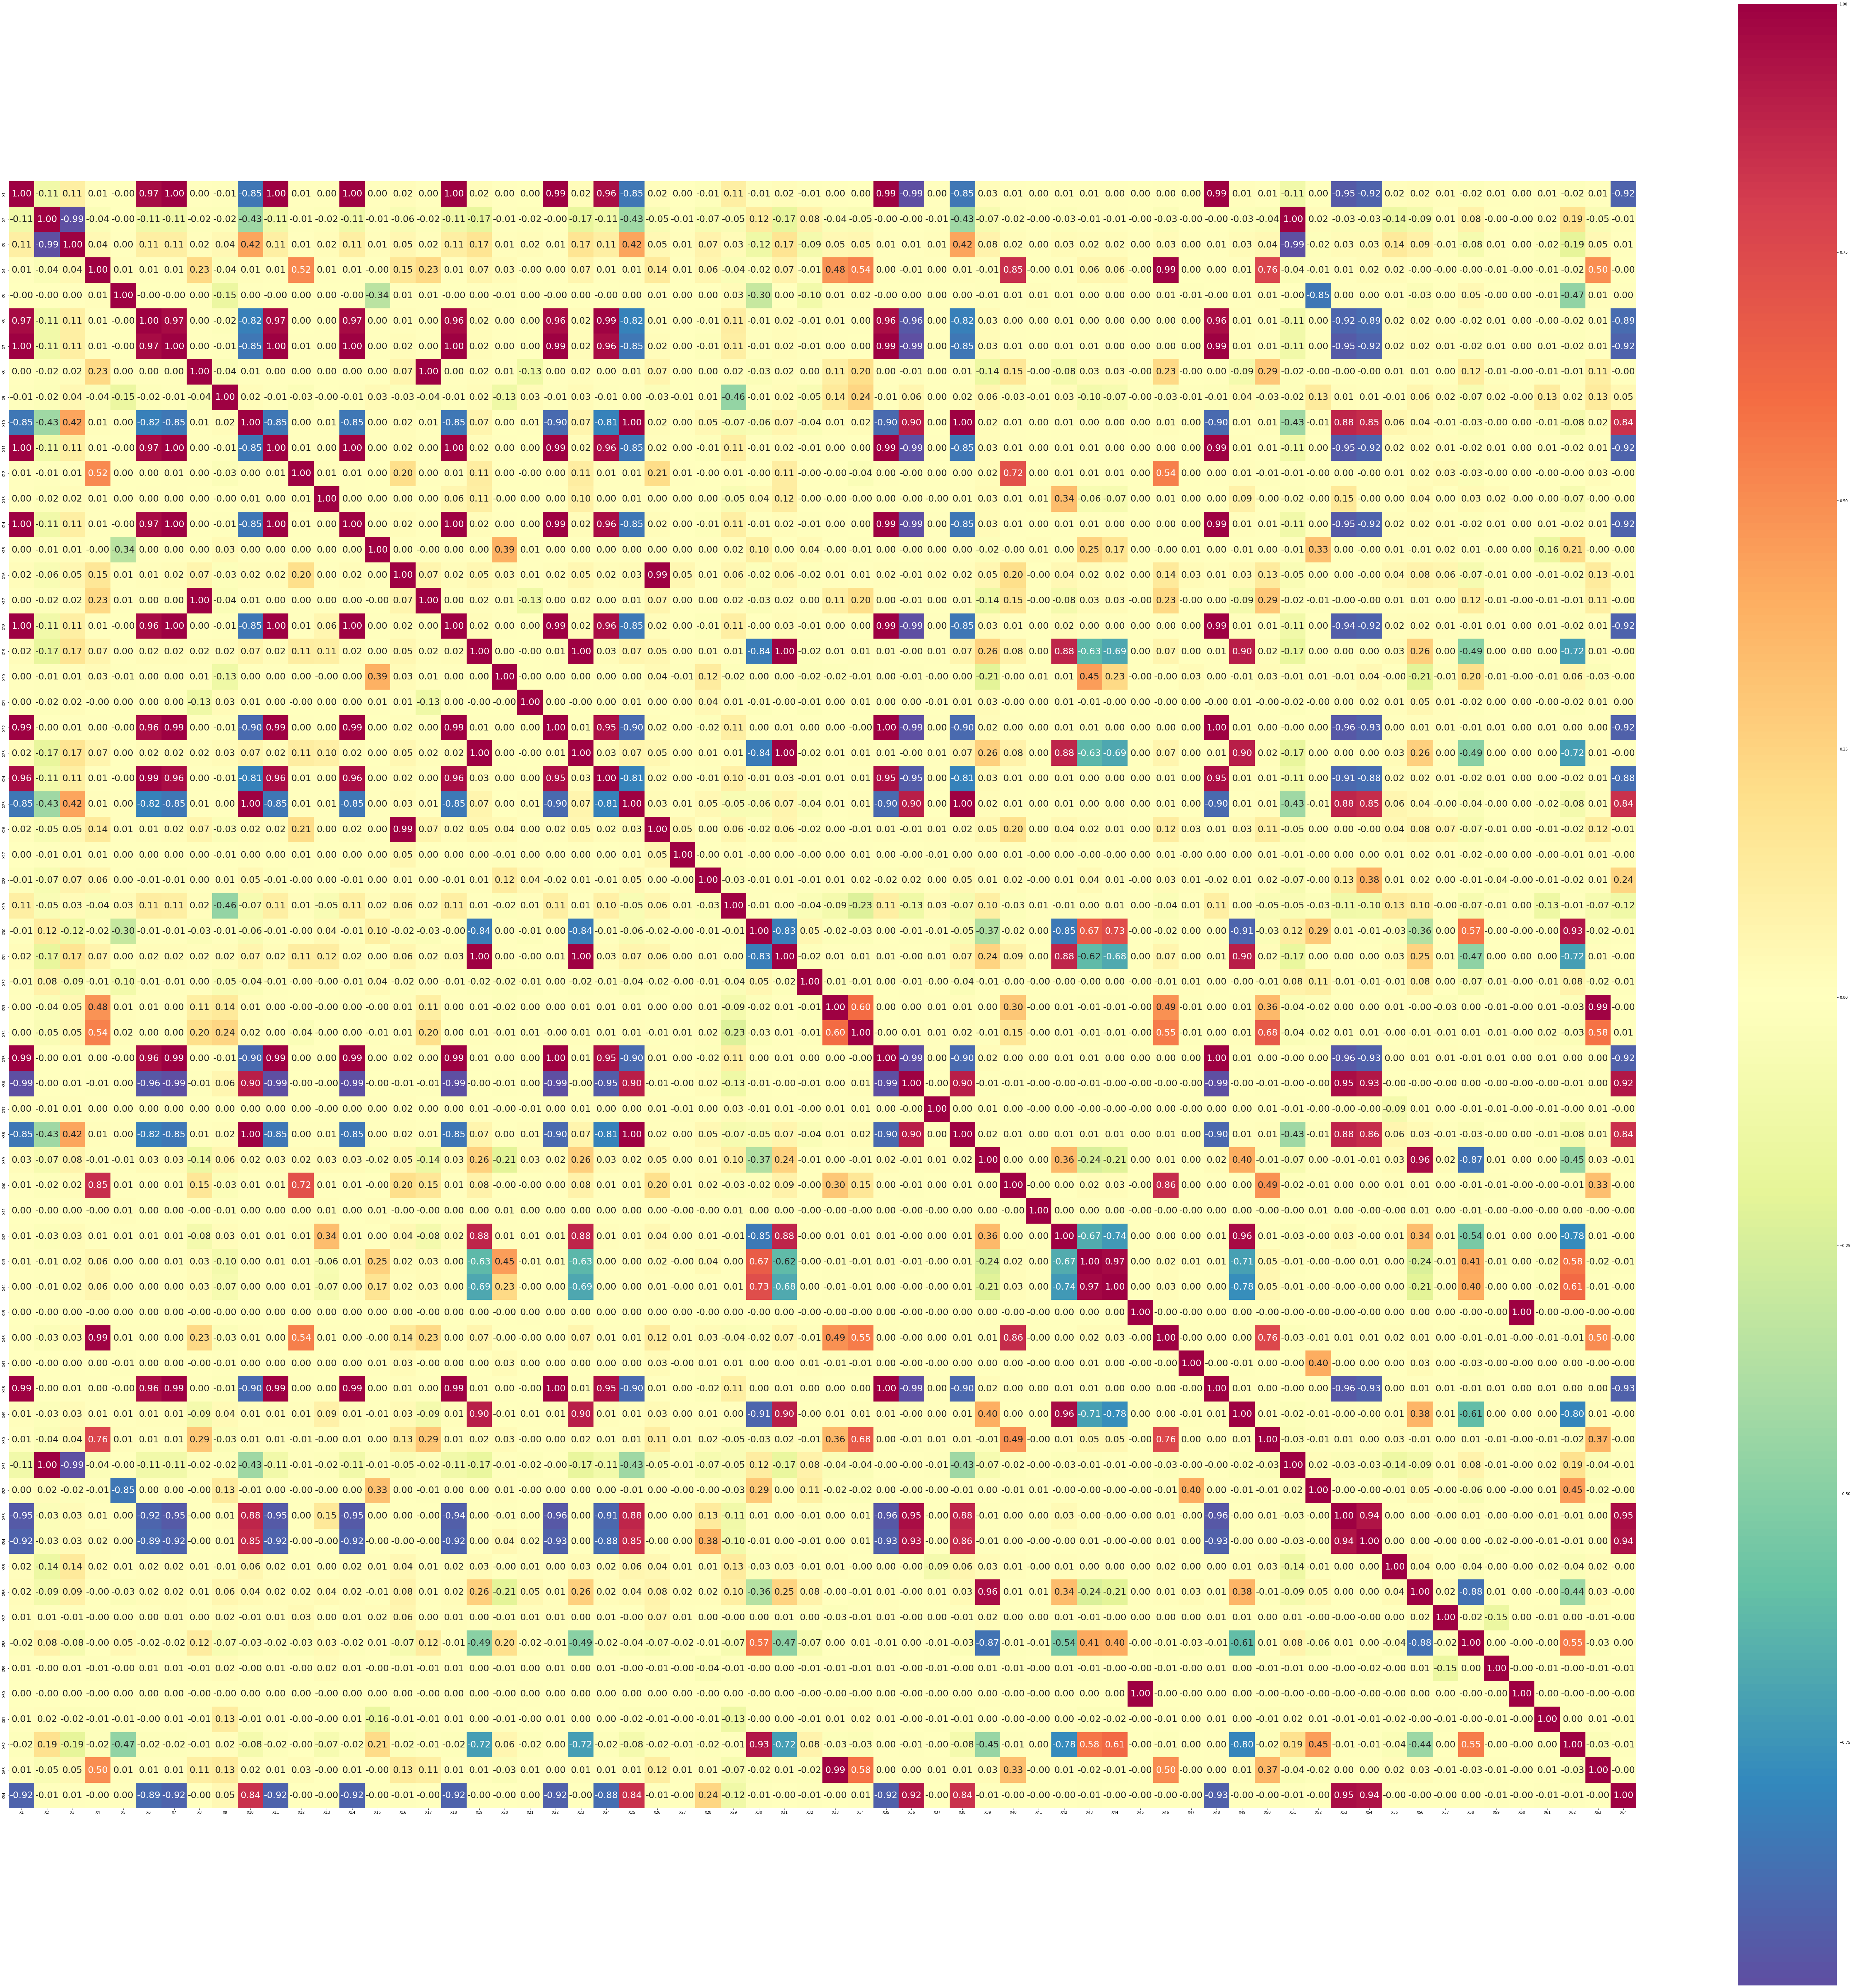

In [18]:
corrmat = X_train.corr()
plt.subplots(figsize=(100,100)) 
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 25}, 
                 yticklabels=X_train.columns, 
                 xticklabels=X_train.columns, 
                 cmap="Spectral_r")
plt.show()

Performing PCA to get the number of features that are actually adding value to the target variable and not noise. As there are 64 variables, PCA becomes important to identify the attributes that contribute maximum variance at a confidence interval. It can be noted that certain features have high correlation and adding redundancy through the heatmap.

### PCA

<BarContainer object of 64 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal component index')

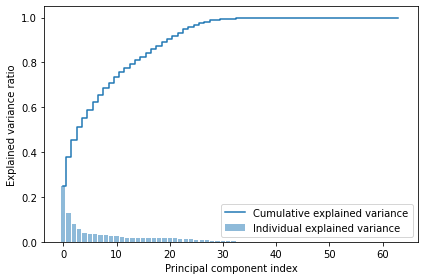

In [19]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
variance_goal_pct = 95
features_for_goal = helper.num_components_for_cum_variance(pca, .01 * variance_goal_pct)
print("To capture {f:d}% of variance we need {d:d} synthetic features.".format(f=variance_goal_pct, d=features_for_goal))

To capture 95% of variance we need 25 synthetic features.


In [21]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=150)

<Figure size 1440x1440 with 0 Axes>

<BarContainer object of 64 artists>

Text(0.5, 0, 'Feature Importance')

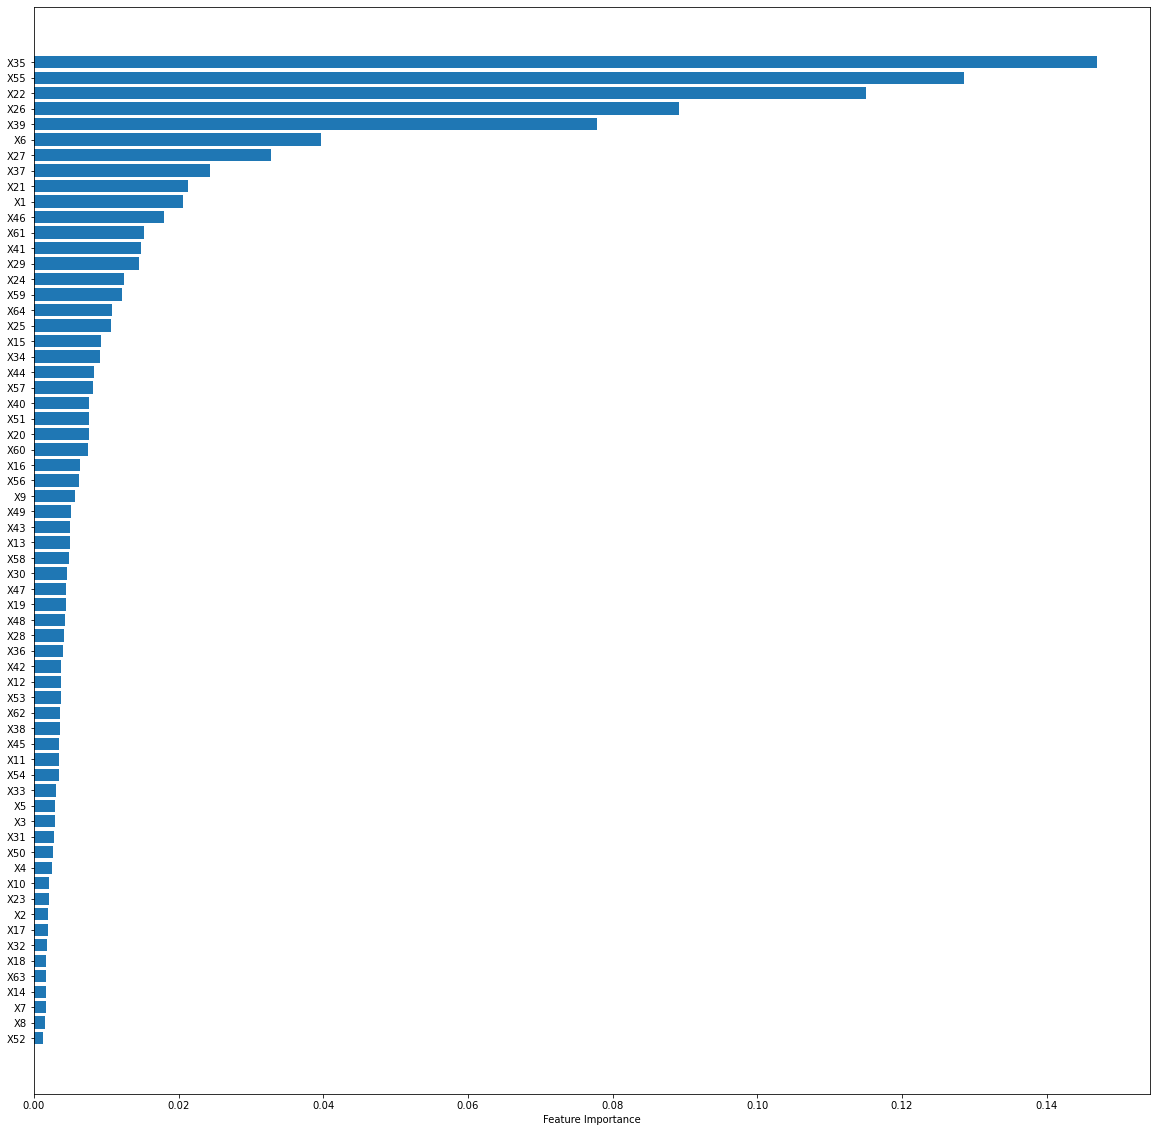

In [22]:
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20, 20))
plt.barh(X_train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

It can be seen that 25 synthetically created variables from PCA can explain 95% of the variance of target variable. This can be used as a pre-processing result for classifiers to reduce its overhead and to handle high-dimensionality problems.

This exercise creates a rough idea that X35(Profit On Sales/total assets) contributes maximum towards the variance of the target variable. Followed by X55(Working Capital), X22(Profit on Operating activities), X26(net profit + depreciation/ total liabilities) and so on. Overall the idea that for the companies to be strong and away from bankruptcy, profits are important is confirmed by PCA Analysis.

As the data is company Bankruptcy data, the basic assumption is that features in the dataset is linearly correlated and hence I am using feature engineering methods that handle linear data.

## Classifier Implementation

### Recall vs Precision vs Accuracy

Recall: Predicting True Positives (TP) out of True Positives and False Negatives, i.e how accurately our model identified bankrupt companies out of the companies that are actually going to go bankrupt.
Precision: Predicting True Positives (TP) out of True Positives and False Positive,i.e accuracy of correctly identifying companies that are bankrupt out of all the companies that are identified as bankrupt.

As specified in the instructions: "You may assume that it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt.", recall becomes an important metric over precision. As we already know that the data given to us is highly imbalanced, taking accuracy as the performance metric of the classifier gives misleading results as eventhough I identfy all companies as not going bankrupt in a dataset that has 95% Class label '0', my model would be 95% accurate and would perform poorly on an unseen/out-of-sample data. For the classfiers that have high accuracy score might be because of correctly predicting True Negatives too, which for the moment is not a concern for this project. At the same time we want our model to spot as many real 1(Bankrupt) as possible over predicting 1(Bankrupt) as correct as possible, hence we choose Recall over Precision. 

### Logistic Regression

In [23]:
def Logis_feature_selection(X_train,y_train):
    name = "Logistic Regression"
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = LogisticRegression(solver = 'lbfgs',C=2.0,max_iter=10000)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    return features_important 

In [24]:
def Logis_CV(X_train,y_train,clf):
    print(f'cross_val_score (K = 5)')
    print(f'{cross_val_score(clf,X_train, y_train, cv = 5)}')

In [25]:
def Logis_Precision_recall_Curve_train(X_train,y_train,clf):
    y_train_pred_prob = clf.predict_proba(X_train)
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob[:,1])
    precision_recall = PrecisionRecallDisplay(precision = precision,recall = recall)
    precision_recall.plot()

In [26]:
def Logis_ROC_Curve_train(X_train,y_train,clf):
    plot_roc_curve(clf, X_train, y_train, name='Bankruptcy')

In [27]:
def Logis_Model(X_train,y_train,X):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = LogisticRegression(solver = 'lbfgs',C=2.0,max_iter=10000)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    X_filtered = X.iloc[:,selector.get_support()]
    return clf,X_filtered

#### Observations on Logistic Regression:
1. For solver= 'lbfgs' and C=2.0 hyperparameters, I got the best result of Logistic Regression. I have chosen lbfgs over other solvers because it was giving me better convergence.
2. I observed that applying synthetically created features using PCA did not give me impressive results, I used SelectfromModel method which choose 17 features to input into the classifier and gave the best results.
3. Cross-Validation score, Training score and testing score were very close indicating a good fit model.
4. Area under the Curve (AUC) is 0.91 which is close to 1 indicating a good fit model. The Precision-Recall curve indicates the trade of between Precision and Recall.
5. I achieved highest testset recall of 78.5% for Logistic regression. But the accuracy is 82.8%. I have selected to print the results of logistic regression classifier with feature engineering over other models like Random Forest and KNN with higher accuracy scores because I am concerned about getting a model with high recall rate over accuracy and precision.

### Random Forest Classifier

In [28]:
def Rf_Model(X_train,y_train):
    pipeline = Pipeline(steps=[('Scaler',StandardScaler()),('PCA',PCA(n_components=17)),('rdf', RandomForestClassifier(n_estimators = 25,max_depth = 5,random_state=42))])
    pipeline.fit(X_train,y_train)
    return pipeline

In [29]:
def Rf_Model_with_feature_selection(X_train,y_train,X):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = RandomForestClassifier(n_estimators = 35,max_depth = 5,random_state=42)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    X_filtered = X.iloc[:,selector.get_support()]
    return clf,X_filtered

In [30]:
def Rf_feature_selection(X_train,y_train):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = RandomForestClassifier(n_estimators = 35,max_depth = 5,random_state=42)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    return features_important

In [31]:
def Rf_CV(X_train,y_train,clf):
    print(f'cross_val_score (K = 5)')
    print(f'{cross_val_score(clf,X_train, y_train, cv = 5)}')

In [32]:
def Rf_Precision_recall_Curve_train(X_train,y_train,clf):
    y_train_pred_prob = clf.predict_proba(X_train)
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob[:,1])
    precision_recall = PrecisionRecallDisplay(precision = precision,recall = recall)
    precision_recall.plot()

In [33]:
def Rf_ROC_Curve_train(X_train,y_train,clf):
    plot_roc_curve(clf, X_train, y_train, name='Bankruptcy')

### Observations on Random Forest Classifier
1. I tried Random Forest Classifier with feature engineering techniques like PCA and SelectFromModel and got higher accuracy but got inferior recall scores than Logistic regression with feature engineering for various values of hyperparamaeters of Random Forest.
2. Eventhough RandomForest is a bagging Classifier which is a better classifier than Logistic regression on many cases due to its ensemble technique, for this unbalanced Bankruptcy dataset, it performed inferior to Logistic Regression on recall score parameter.
3. Area under the curve(AUC) is 0.97 indicates a got fit model. The Precision-Recall curve indicates the trade of between Precision and Recall.
4. With n_components = 25 and max_depth = 5, I got the best testset performance of Accuracy 84.3%% (Higher than Logistic Regression) but 61.5% Recall scores (Lower than Logistic Regression). Hence, I have chosen not to print the results of this model.
5. With the same hyperparameters and using SelectFromModel I got 88.6% accuracy and 67.7% recall.

### KNN Classifier

In [34]:
def KNN_Feature_Selection(X_train,X_test,y_train,y_test,X):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.transform(X_test)
    k_range = range(1,26)
    accuracy_scores = {}
    recall_scores = {}
    accuracy_scores_list = []
    recall_scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled,y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy_scores[k] = metrics.accuracy_score(y_test,y_pred)
        accuracy_scores_list.append(metrics.accuracy_score(y_test,y_pred))
        recall_scores[k] = metrics.recall_score(y_test,y_pred)
        recall_scores_list.append(metrics.recall_score(y_test,y_pred))
    
    plt.plot(k_range,accuracy_scores_list,'r')
    plt.plot(k_range,recall_scores_list,'b')
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Recall')

In [35]:
def KNN_Model(X_train,y_train):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors = 18)
    knn.fit(X_train_scaled,y_train)
    pipeline = Pipeline(steps=[('Scaler',StandardScaler()),('PCA',PCA(n_components=25)),('knn', KNeighborsClassifier(n_neighbors=18))])
    pipeline.fit(X_train,y_train)
    #return knn
    return pipeline

In [36]:
def KNN_Precision_recall_Curve_train(X_train,y_train,clf):
    y_train_pred_prob = clf.predict_proba(X_train)
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob[:,1])
    precision_recall = PrecisionRecallDisplay(precision = precision,recall = recall)
    precision_recall.plot()

In [37]:
def KNN_ROC_Curve_train(X_train,y_train,clf):
    plot_roc_curve(clf, X_train, y_train, name='Bankruptcy')

#### Observations on KNN Classifier
1. I displayed the graph of precision vs recall with changes in K values to find the optimium K value which is 18.
2. Using feature engineering technique of PCA improved the results of the model and gave an accuracy score of 82.4% and recall score of 67.7% on the test dataset.
3. Area under the curve(AUC) is 0.97 indicates a got fit model. The Precision-Recall curve indicates the trade of between Precision and Recall.
4. I have not chosen this model because it has inferior recall score compared to Logistic Regression eventhough it has higher accuracy scores.

### SVM Classifier

In [38]:
def SVM_Model(X_train,y_train):
    pipeline = Pipeline(steps=[('Scaler',StandardScaler()),('pca',PCA(n_components=25)),('svm', SVC(kernel='sigmoid',C=1.3,random_state=42,probability=True))])
    pipeline.fit(X_train,y_train)
    return pipeline

In [39]:
def SVM_Model_with_feature_selection(X_train,y_train,X):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = SVC(kernel='sigmoid',C=1.3,random_state=42,probability=True)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    X_filtered = X.iloc[:,selector.get_support()]
    return clf,X_filtered

In [40]:
def SVM_feature_selection(X_train,y_train):
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    clf = SVC(kernel='sigmoid',C=1.3,random_state=42,probability=True)
    selector = SelectFromModel(clf)
    features_important = selector.fit_transform(X_train_scaled, y_train)
    clf.fit(features_important, y_train)
    return features_important 

In [41]:
def SVM_CV(X_train,y_train,clf):
    print(f'{cross_val_score(clf,X_train, y_train, cv = 5)}')

In [42]:
def SVM_Precision_recall_Curve_train(X_train,y_train,clf):
    y_train_pred_prob = clf.predict_proba(X_train)
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob[:,1])
    precision_recall = PrecisionRecallDisplay(precision = precision,recall = recall)
    precision_recall.plot()

In [43]:
def SVM_ROC_Curve_train(X_train,y_train,clf):
    plot_roc_curve(clf, X_train, y_train, name='Bankruptcy')

#### Observations on SVM Classifier
1. I used sigmoid kernel which is better suited for binary classification and adjusted hyperparameter C= 1.3 to get the max recall score from the model.
2. I applied PCA on 25 components as a feature engineering technique to increase the recall score of the model.
3. I observed an accuracy score of 70.9% and recall score of 75.4% on test data set which is better than KNN and Random Forest in terms of recall score but is lesser than the logistic regression model.

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

#### Test Data Preparation:

In [44]:
def logis_testdata_prepare(X_train,y_train,X):
    X = X.apply(pd.to_numeric, errors='coerce')
    X = X.interpolate()
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    X = pd.DataFrame(scalar.transform(X))
    return X

In [45]:
def testdata_prepare(X_train,y_train,X):
    X = X.apply(pd.to_numeric, errors='coerce')
    X = X.interpolate()
    return X

Give the Classifier name here:

In [46]:
name = 'Logistic Regression Classifier' 

I have chosen Logistic Regression over other classifiers because of its superior performance in terms of recall score and comparable Accuracy score.

In [47]:
import pandas as pd
import os
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, precision_recall_curve


def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    # YOUR CODE GOES HERE
    predictions = []
    clf = None
    

    if name == 'Logistic Regression Classifier':
        X = logis_testdata_prepare(X_train,y_train,X)
        features_important = Logis_feature_selection(X_train,y_train)
        clf, X_filtered = Logis_Model(X_train,y_train,X)
        #Logis_CV(X_train,y_train,clf)
        Logis_Precision_recall_Curve_train(features_important,y_train,clf)
        Logis_ROC_Curve_train(features_important,y_train,clf)
        predictions = clf.predict(X_filtered)
    elif name == 'Random Forest Classifier':
        X = testdata_prepare(X_train,y_train,X)
        clf = Rf_Model(X_train,y_train)
        Rf_CV(X_train,y_train,clf)
        Rf_Precision_recall_Curve_train(X_train,y_train,clf)
        Rf_ROC_Curve_train(X_train,y_train,clf)
        predictions = clf.predict(X)
    elif name == 'KNN Classifier':
        X = testdata_prepare(X_train,y_train,X)
        KNN_Feature_Selection(X_train,X_test,y_train,y_test,X)
        clf = KNN_Model(X_train,y_train)
        KNN_Precision_recall_Curve_train(X_train,y_train,clf)
        KNN_ROC_Curve_train(X_train,y_train,clf)
        predictions = clf.predict(X)
    elif name == 'Random Forest Classifier with Feature Selection':
        X = logis_testdata_prepare(X_train,y_train,X)
        features_important = Rf_feature_selection(X_train,y_train)
        clf, X_filtered = Rf_Model_with_feature_selection(X_train,y_train,X)
        Rf_CV(X_train,y_train,clf)
        Rf_Precision_recall_Curve_train(features_important,y_train,clf)
        Rf_ROC_Curve_train(features_important,y_train,clf)
        predictions = clf.predict(X_filtered)
    elif name == 'Support Vector Machine Classifier':
        X = testdata_prepare(X_train,y_train,X)
        clf = SVM_Model(X_train,y_train)
        SVM_CV(X_train,y_train,clf)
        SVM_Precision_recall_Curve_train(X_train,y_train,clf)
        SVM_ROC_Curve_train(X_train,y_train,clf)
        predictions = clf.predict(X)
    return predictions


In [48]:
def Metrics(X_test,y_test):
 
    #print("Training Metrics: ")
    #y_test_pred = MyModel(X_train)
    #F1_score_train = f1_score(y_train, y_test_pred)
    #accuracy_train = accuracy_score(y_train, y_test_pred)
    #recall_train = recall_score(y_train, y_test_pred, pos_label=1, average="binary")
    #precision_train = precision_score(y_train,   y_test_pred, pos_label=1, average="binary")
    
    #print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}, F-1 score {f:3.1%}".format(m=name,
    #                                                                            a=accuracy_train,
    #                                                                            r=recall_train,
    #                                                                            p=precision_train,
    #                                                                            f = F1_score_train                       
    #                                                                            )
    #         )
    #confusion_matrix(y_train,y_test_pred)
    #pd.crosstab(y_train, y_test_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
    #print(classification_report(y_train, y_test_pred))
    
    print("Testing Metrics: ")
    y_test_pred = MyModel(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    F1_score_test = f1_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
    precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

    print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}, F-1 score {f:3.1%}".format(m=name,
                                                                                a=accuracy_test,
                                                                                r=recall_test,
                                                                                p=precision_test,
                                                                                f = F1_score_test                       
                                                                                )
             )
    confusion_matrix(y_test,y_test_pred)
    pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
    print(classification_report(y_test, y_test_pred))

The name of the Classifier is: Logistic Regression Classifier
Testing Metrics: 
	Logistic Regression Classifier Accuracy: 82.8%, Recall 78.5%, Precision 25.1%, F-1 score 38.1%
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       899
           1       0.25      0.78      0.38        65

    accuracy                           0.83       964
   macro avg       0.62      0.81      0.64       964
weighted avg       0.93      0.83      0.86       964



/Users/shashanksr/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


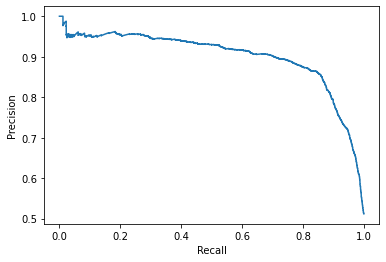

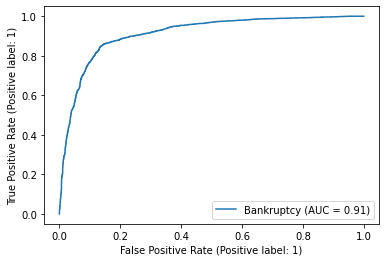

In [49]:
print(f"The name of the Classifier is: {name}")
# X_test, y_test = X_hold, y_hold   #Remove the comment at the start of this line before running this model
Metrics(X_test,y_test) 

# Results

In [50]:
result = {
        'Training Accuracy': [85.5,88,90.9,90.3,74.2],
        'Training Precision': [85.0,87.1,90.7,86.8,78],
        'Training Recall': [86.2,89.2,91.2,95.2,91.5],
        'Testing Accuracy': [82.8,84.3,88.6,82.4,70.9],
        'Testing Precision': [25.1,24.1,33.1,22.8,15.6],
        'Testing Recall': [78.5,61.5,67.7,67.7,75.4],
        }

df = pd.DataFrame(data=result, index = ['Logistic Regression', 'Random Forest with PCA', 'Random Forest with SelectFromModel','KNN with PCA','SVM with PCA'])

print(df)

                                    Training Accuracy  Training Precision  \
Logistic Regression                              85.5                85.0   
Random Forest with PCA                           88.0                87.1   
Random Forest with SelectFromModel               90.9                90.7   
KNN with PCA                                     90.3                86.8   
SVM with PCA                                     74.2                78.0   

                                    Training Recall  Testing Accuracy  \
Logistic Regression                            86.2              82.8   
Random Forest with PCA                         89.2              84.3   
Random Forest with SelectFromModel             91.2              88.6   
KNN with PCA                                   95.2              82.4   
SVM with PCA                                   91.5              70.9   

                                    Testing Precision  Testing Recall  
Logistic Regression       

In [51]:
print("Done!")

Done!
